In [2]:
import pandas as pd
bankrupt = pd.read_csv("data/lab2-alldata/bankrupt.txt", sep=",")

# Feltételezzük, hogy a 'bankrupt' DataFrame már be van olvasva
print(bankrupt["Bankrupt?"].describe())

# Százalékos megoszlás
counts = bankrupt["Bankrupt?"].value_counts()
percentages = bankrupt["Bankrupt?"].value_counts(normalize=True) * 100

print("\nCégek száma kategóriánként:")
print(counts)
print("\nSzázalékos arányok:")
print(percentages)

count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt?, dtype: float64

Cégek száma kategóriánként:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Százalékos arányok:
Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64


The descriptive statistics show that only about 3.2% of the companies went bankrupt, while 96.8% did not.
This means the dataset is highly imbalanced, as one class (non-bankrupt companies) heavily dominates the other.
Such imbalance may affect the performance of machine learning models, since a model could achieve high accuracy by simply predicting that most companies are not bankrupt.

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Importing the datasets
# -------------------------------------------------------------
# The first column contains row labels (index),
# so we set index_col=0 , (means the first coloumn is just index) to import the data correctly.
x_train = pd.read_csv("data/lab2-alldata/x_train.csv", index_col=0)
x_test = pd.read_csv("data/lab2-alldata/x_test.csv", index_col=0)
y_train = pd.read_csv("data/lab2-alldata/y_train.csv", index_col=0)
y_test = pd.read_csv("data/lab2-alldata/y_test.csv", index_col=0)

# 2. Check the number of observations in each dataset
# -------------------------------------------------------------
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 3. Check class distribution in training and test sets
# -------------------------------------------------------------
print("\nClass distribution in y_train:")
print(y_train['Bankrupt'].value_counts(normalize=True) * 100)

print("\nClass distribution in y_test:")
print(y_test['Bankrupt'].value_counts(normalize=True) * 100)

# 4. Standardizing the data
# -------------------------------------------------------------
# StandardScaler transforms the data so that each feature has mean 0 and standard deviation 1
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# fit_transform() computes the mean and std on x_train and applies the scaling
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),
                              columns=x_train.columns,  # keep original column names
                              index=x_train.index)      # keep original row indices

# Transform the test data using the same scaler
# Important: we only transform, we do NOT fit again on test data
x_test_scaled = pd.DataFrame(scaler.transform(x_test),
                             columns=x_test.columns,
                             index=x_test.index)

# 5. Verify that the scaled data has the same number of rows
# -------------------------------------------------------------
print("\nScaled x_train shape:", x_train_scaled.shape)
print("Scaled x_test shape:", x_test_scaled.shape)


x_train shape: (5455, 12)
x_test shape: (1364, 12)
y_train shape: (5455, 1)
y_test shape: (1364, 1)

Class distribution in y_train:
Bankrupt
0    96.810266
1     3.189734
Name: proportion, dtype: float64

Class distribution in y_test:
Bankrupt
0    96.627566
1     3.372434
Name: proportion, dtype: float64

Scaled x_train shape: (5455, 12)
Scaled x_test shape: (1364, 12)


# 🎯 1. Target Variable Distribution (Célváltozó eloszlása)

This is about **the proportion (arány)** of different categories — for example, how many companies went **bankrupt (csődbe ment)** and how many did not.

The goal here is to have a **correct sampling (korrekt mintavétel)** so that the model is **not biased (nem torz)**.

👉 This is about the **target variable (y)**, not the **explanatory variables (magyarázó változók, x)**.

---

## ⚙️ 2. Standardization (Standardizálás)

This applies to the **input data (x_train, x_test)**.
The goal is to **put all features (jellemzők) on the same scale (skála)**,
that is:
**mean = 0**, **standard deviation = 1**.

This is necessary because many algorithms — such as **Logistic Regression, SVM, KNN** — are **sensitive (érzékeny)** if one variable ranges from 0–1 and another ranges, for example, from 0–10,000,000.

👉 Therefore, **standardization is a mathematical preparation of input data (a bemeneti adatok matematikai előkészítése)**, and it **does not depend** on how many companies went bankrupt.


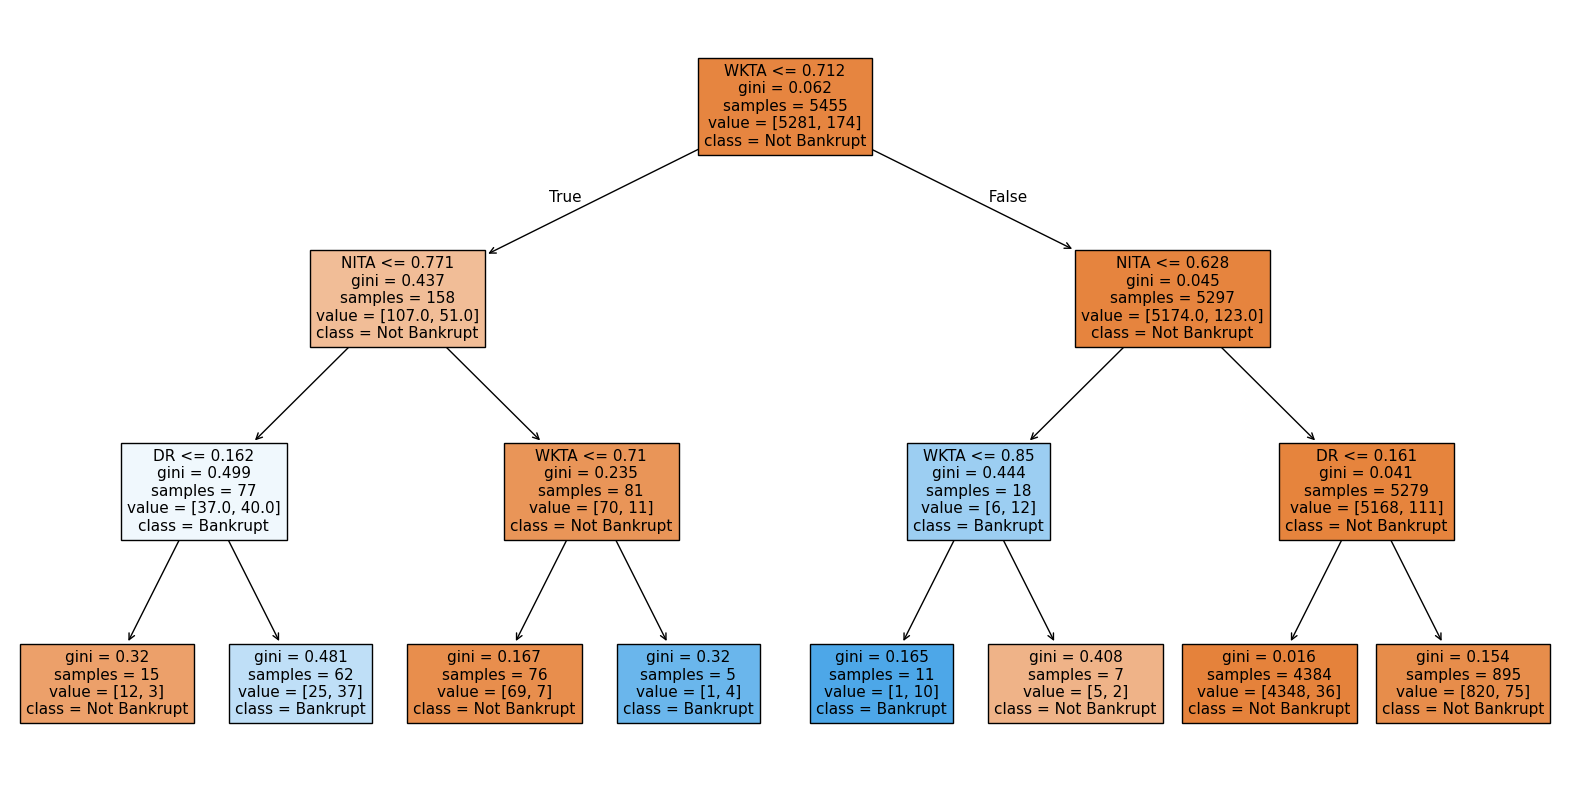

In [4]:
# ==========================================
# 🧠 Classification Tree for Bankruptcy Prediction
# ==========================================

# 1️⃣ Import necessary libraries
# 'tree' contains DecisionTreeClassifier (used to build classification trees)
# 'matplotlib.pyplot' is used to visualize (megjeleníteni) the decision tree
from sklearn import tree
import matplotlib.pyplot as plt

# 2️⃣ Create a Decision Tree model
# The parameter max_depth=3 means the tree will grow only 3 levels deep.
# This prevents the model from memorizing (megtanulni kívülről) the training data too well
# and helps avoid overfitting (túltanulás).
# random_state=42 ensures reproducibility (ugyanazt az eredményt kapjuk minden futtatáskor).
class_tree_bankrupt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# 3️⃣ Train (fit) the model
# The model learns (megtanulja) relationships between input variables (x_train)
# and the target variable (y_train), which tells whether a company went bankrupt or not.
class_tree_bankrupt.fit(x_train, y_train)

# 4️⃣ Visualize the trained decision tree
# figsize controls the size of the plot (ábra mérete)
plt.figure(figsize=(20, 10))

# plot_tree() displays the structure of the tree:
# - feature_names: the names of input variables used for splitting (elosztás)
# - filled=True: colors nodes according to class (osztály)
# - class_names: shows human-readable class labels (Bankrupt / Not Bankrupt)
tree.plot_tree(
    class_tree_bankrupt,
    feature_names=x_train.columns,
    filled=True,
    class_names=["Not Bankrupt", "Bankrupt"]
)

# Finally, display (megjelenít) the tree
plt.show()


# 🌳 Interpretation of the Classification Tree (Bankruptcy Prediction)

### 🧠 What the Tree Represents
A **classification tree** predicts whether a company will go **bankrupt** or **not bankrupt** by splitting the data (adatfelosztás) into smaller and purer groups based on feature values (változóértékek).

Each **node (csomópont)** in the tree represents a decision point based on one feature.
At every split, the model chooses the feature and threshold that best separate the two classes.

---

### 🔝 Topmost Node (Root Node)
The **topmost node (gyökércsomópont)** contains **all training samples** before any split.
It shows the following information:

- **Condition (feltétel)** — the rule used to divide the dataset into two groups.
- **Samples (minták)** — number of companies in this node (usually all training data).
- **Value (értékek)** — how many companies in this node belong to each class
  (for example, how many are *bankrupt* vs *not bankrupt*).
- **Class (osztály)** — the majority class, i.e., the most frequent label in this node.
- **Gini** — a measure of **impurity (tisztátalanság)** that shows how mixed the classes are.

---

## 🔹 Elements in Each Node

1. **Feature ≤ value (változó ≤ küszöbérték)**
   - The condition used to split the data at that node (elosztás feltétele).
   - Samples that meet the condition go to the left branch (True), others go to the right (False).

2. **Gini (Gini-index)**
   - Measures impurity (tisztátalanság) of the node.
   - 0 = pure (all samples belong to one class), higher values = more mixed classes (több osztály vegyesen).

3. **Samples (minták)**
   - The number of observations (cégek száma) in that node.

4. **Value (értékek)**
   - How many samples belong to each class (bankrupt / not bankrupt).
   - Format: `[number of Not Bankrupt, number of Bankrupt]`.

5. **Class (osztály)**
   - The majority (többségi) class in that node.
   - The class that would be predicted if a new sample reaches this node.

---

## 🔹 Example: Top Node (Root Node)

- WKTA <= 0.712
- gini = 0.062
- samples = 5455
- value = [5281, 174]
- class = Not Bankrupt


- **Feature:** `WKTA <= 0.712` → First split is based on the WKTA feature.
- **Gini:** 0.062 → Node is very pure (almost all companies are Not Bankrupt).
- **Samples:** 5455 → All companies in the training data are included.
- **Value:** [5281, 174] → 5281 Not Bankrupt, 174 Bankrupt.
- **Class:** Not Bankrupt → Most common class in this node.

---

### ⚙️ Understanding the Gini Value
The **Gini index** tells how pure or impure a node is:
- If a node contains companies **only from one class**, its Gini value is **0** (perfectly pure).
- If a node has **a mix of classes**, the Gini value is **higher** (more impure).
- The top node usually has the **highest impurity**, because it contains both bankrupt and not bankrupt companies.

When the tree splits the data, it chooses the feature that **reduces impurity the most**.
This means each branch becomes purer (more homogeneous — homogénebb),
and the model becomes better at distinguishing between the two outcomes.

---

### 📊 Example Interpretation (for the top node)
Let’s imagine:
- The training data includes all companies.
- Around 97% are **not bankrupt**, and 3% are **bankrupt**.
The **top node** will show that imbalance — most samples belong to one class.
Therefore, the impurity (Gini) is relatively small, but not zero, because both classes exist.

---

### ✅ Summary
- The **root node** contains all training data.
- The **Gini index** shows how mixed the classes are — lower values mean purer groups.
- The tree splits using the feature that most improves class separation (legjobban elválasztja az osztályokat).
- The process continues until the maximum depth (here, 3) is reached.

In [5]:
# ==========================================
# 🧠 Classification Tree for Bankruptcy Prediction (Part B)
# ==========================================

# 1️⃣ Check how many terminal nodes (végső / levél csomópontok) the tree has.
# A terminal node (or leaf) is a node where the decision process stops (nincs további elágazás).
# The method get_n_leaves() returns this number.

n_leaves = class_tree_bankrupt.get_n_leaves()

# Print the result to the console (konzolra kiírjuk az eredményt)
print(f"The classification tree has {n_leaves} terminal nodes (leaves).")

# 2️⃣ Optionally, we can also check the depth (mélység) of the tree.
# The method get_depth() returns how many levels deep the tree is
# (from the root node to the deepest leaf node).

tree_depth = class_tree_bankrupt.get_depth()
print(f"The maximum depth of the tree is {tree_depth}.")


The classification tree has 8 terminal nodes (leaves).
The maximum depth of the tree is 3.


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions
y_pred_train = class_tree_bankrupt.predict(x_train)
y_pred_test = class_tree_bankrupt.predict(x_test)

# Confusion matrices
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Classification reports
print("\nTrain Classification Report:")
print(classification_report(y_train, y_pred_train))

print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))


Train Confusion Matrix:
[[5254   27]
 [ 123   51]]

Test Confusion Matrix:
[[1305   13]
 [  36   10]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5281
           1       0.65      0.29      0.40       174

    accuracy                           0.97      5455
   macro avg       0.82      0.64      0.70      5455
weighted avg       0.97      0.97      0.97      5455


Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.43      0.22      0.29        46

    accuracy                           0.96      1364
   macro avg       0.70      0.60      0.64      1364
weighted avg       0.95      0.96      0.96      1364



# Decision Tree Model Analysis

## 🔍 Understanding the Classification Report

| Metric | Meaning | What to Look For |
|:--|:--|:--|
| **Precision** | Out of all the samples the model predicted as a certain class, how many were actually correct. | High precision = few **false positives** (the model rarely predicts a class incorrectly). |
| **Recall** | Out of all the actual samples of that class, how many the model correctly identified. | High recall = few **false negatives** (the model rarely misses true cases). |
| **F1-score** | The harmonic mean of precision and recall — a balanced indicator of accuracy. | High F1 = good balance between precision and recall. |
| **Support** | The number of true samples for each class. | Large differences indicate **class imbalance**. |

---

## ⚙️ Key Concepts: False Positives and False Negatives

| Term | Meaning | Example in This Case |
|:--|:--|:--|
| **True Positive (TP)** | Correctly predicted *bankrupt* companies. | The model predicts “bankrupt” and the company is actually bankrupt. |
| **False Positive (FP)** | Incorrectly predicted *bankrupt* companies. | The model predicts “bankrupt,” but the company is actually not bankrupt. |
| **True Negative (TN)** | Correctly predicted *non-bankrupt* companies. | The model predicts “non-bankrupt,” and that’s true. |
| **False Negative (FN)** | Missed *bankrupt* companies. | The model predicts “non-bankrupt,” but the company was actually bankrupt. |

➡️ **High false negatives (FN)** are the biggest problem here because they mean **failing to detect real bankruptcies**, which could be costly in real-world scenarios.

---

## 📊 Interpretation of the Results

### Training Set
- **Class 0 (Non-bankrupt):**
  - Precision = **0.98**, Recall = **0.99** → Excellent detection.
  - Very few false positives or false negatives.
- **Class 1 (Bankrupt):**
  - Precision = **0.65**, Recall = **0.29** → Weak performance.
  - Many false negatives: actual bankrupts predicted as non-bankrupt.

### Test Set
- **Class 0 (Non-bankrupt):**
  - Precision = **0.97**, Recall = **0.99** → Stable performance.
  - Few false classifications.
- **Class 1 (Bankrupt):**
  - Precision = **0.43**, Recall = **0.22** → Very poor recall.
  - The model misses most real bankrupt cases (many false negatives).

---

## ⚠️ What to Notice

1. **Accuracy (0.96–0.97)** looks high, but it’s misleading due to **class imbalance**.
   Most companies are non-bankrupt, so predicting “non-bankrupt” most of the time yields high accuracy.
2. **Low recall for class 1** (bankrupt) = many **false negatives** → the model fails to catch real bankrupt companies.
3. **Low precision for class 1** = many **false positives** → some healthy companies are incorrectly marked as bankrupt.
4. **No significant overfitting:** Train and test metrics are very similar.
   The issue is with the imbalance, not memorization.

---

## ✅ How to Improve the Model

To better detect the **minority class (bankrupt)**:

- **Use class weighting:** `class_weight='balanced'` in the decision tree.
- **Oversample or undersample** to balance the dataset (e.g., SMOTE).
- **Prune** the tree if it’s too deep to avoid overfitting.
- **Try ensemble methods** like Random Forest or Gradient Boosting for more robust predictions.
- **Adjust the classification threshold** to favor recall if detecting bankruptcies is more important than avoiding false alarms.

---

## 🧩 Summary

- The model performs **very well** for the majority class (non-bankrupt).
- It performs **poorly** for the minority class (bankrupt), with **low recall** and **low precision**.
- **Main issue:** High **false negatives**, meaning many bankrupt companies go undetected.
- **Solution:** Balance the data and adjust the model to improve sensitivity toward the bankrupt class.


In [7]:
from sklearn import tree

# Step a) Initialize a large decision tree
# random_state ensures reproducibility (újra előállítható)
prun_tree_bankrupt = tree.DecisionTreeClassifier(random_state=10)

# Compute the cost-complexity pruning path
# Returns the effective alphas (pruning parameter) and total leaf impurities
path = prun_tree_bankrupt.cost_complexity_pruning_path(x_train, y_train)

# Extract alpha values and impurities
alphas, impurities = path.ccp_alphas, path.impurities

# Inspect the first few values to understand the pruning steps
print("Alphas (pruning parameter):", alphas[:10])
print("Impurities (total leaf impurity):", impurities[:10])


Alphas (pruning parameter): [0.         0.0001604  0.00016499 0.00016574 0.00016665 0.00017186
 0.00017313 0.00017367 0.00017459 0.00017599]
Impurities (total leaf impurity): [0.         0.00032081 0.00065078 0.00247396 0.00280727 0.00315099
 0.00349726 0.0038446  0.00419378 0.00454575]


In [8]:
from sklearn import tree

# Create a list to store fitted trees
class_tree_bankrupt_list = []

# Fit a decision tree for each alpha
for alpha in alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(x_train, y_train)
    class_tree_bankrupt_list.append(clf)

# The last element corresponds to the trivial tree (root only)
# Remove it from the list as well as the last alpha
class_tree_bankrupt_list = class_tree_bankrupt_list[:-1]
alphas = alphas[:-1]

print(f"Number of trees after removing the trivial tree: {len(class_tree_bankrupt_list)}")


Number of trees after removing the trivial tree: 67


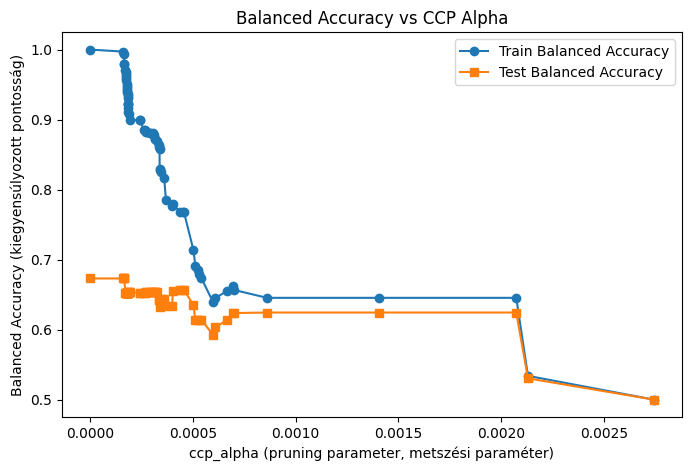

Best alpha based on test balanced accuracy: 0.0001657440942080709
Number of leaves (levél) in the chosen tree: 150
Train Confusion Matrix (konfúziós mátrix):
[[5281    0]
 [   7  167]]

Test Confusion Matrix (konfúziós mátrix):
[[1289   29]
 [  29   17]]

Train Classification Report (osztályozási jelentés):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5281
           1       1.00      0.96      0.98       174

    accuracy                           1.00      5455
   macro avg       1.00      0.98      0.99      5455
weighted avg       1.00      1.00      1.00      5455


Test Classification Report (osztályozási jelentés):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1318
           1       0.37      0.37      0.37        46

    accuracy                           0.96      1364
   macro avg       0.67      0.67      0.67      1364
weighted avg       0.96      0.96      

In [9]:
# Step c) Evaluate all pruned trees using balanced accuracy
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Lists to store balanced accuracy for train and test sets
train_balanced_acc = []  # Train set balanced accuracy (kiegyensúlyozott pontosság)
test_balanced_acc = []   # Test set balanced accuracy

# Loop over all fitted pruned trees
for clf in class_tree_bankrupt_list:
    # Predict the labels on the training data
    y_train_pred = clf.predict(x_train)
    # Predict the labels on the test data
    y_test_pred = clf.predict(x_test)

    # Calculate balanced accuracy for train and test
    train_balanced_acc.append(balanced_accuracy_score(y_train, y_train_pred))
    test_balanced_acc.append(balanced_accuracy_score(y_test, y_test_pred))

# Plot the train and test balanced accuracy versus alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_balanced_acc, marker='o', label='Train Balanced Accuracy')
plt.plot(alphas, test_balanced_acc, marker='s', label='Test Balanced Accuracy')
plt.xlabel('ccp_alpha (pruning parameter, metszési paraméter)')
plt.ylabel('Balanced Accuracy (kiegyensúlyozott pontosság)')
plt.title('Balanced Accuracy vs CCP Alpha')
plt.legend()
plt.show()

# Select the alpha with the highest test balanced accuracy
best_index = test_balanced_acc.index(max(test_balanced_acc))
best_alpha = alphas[best_index]
best_tree = class_tree_bankrupt_list[best_index]

print(f"Best alpha based on test balanced accuracy: {best_alpha}")
print(f"Number of leaves (levél) in the chosen tree: {best_tree.get_n_leaves()}")

# Step d) Evaluate the chosen pruned tree
# Predict on train and test sets
y_train_pred = best_tree.predict(x_train)
y_test_pred = best_tree.predict(x_test)

# Compute confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Train Confusion Matrix (konfúziós mátrix):")
print(train_cm)
print("\nTest Confusion Matrix (konfúziós mátrix):")
print(test_cm)

# Compute classification reports
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("\nTrain Classification Report (osztályozási jelentés):")
print(train_report)
print("\nTest Classification Report (osztályozási jelentés):")
print(test_report)


# Decision Tree Pruning and Evaluation – Textual Explanation

This document explains the results of the **minimal cost-complexity pruning** and the evaluation of the chosen decision tree, based on the output provided.

---

## Step c: Choosing the best alpha

- **Balanced Accuracy** (kiegyensúlyozott pontosság) was used to select the best pruning parameter (`ccp_alpha`).
- The plot `<Figure size 800x500 with 1 Axes>` shows train and test balanced accuracy versus `alpha`.
  - As `alpha` increases → the tree becomes simpler (egyszerűbb fa), the number of leaves decreases.
  - Very small `alpha` → deep tree → potential overfitting (túlillesztés) on train set.
  - Very large `alpha` → overly simple tree → underfitting (alulillesztés), accuracy decreases.
- **Best alpha** based on test balanced accuracy: `0.0001657440942080709`.
- Number of leaves in the chosen tree: `150`.
  - This indicates a moderate complexity (nem túl bonyolult, nem túl egyszerű) tree that balances fitting the data and generalizing well.

---

## Step d: Confusion Matrix and Classification Report

### Train Set

**Confusion Matrix:**

| Pred\True | 0        | 1        |
|------------|----------|----------|
| 0          | 5281     | 0        |
| 1          | 7        | 167      |

**Interpretation:**
- **Class 0 (non-bankrupt / nem csőd):** perfectly predicted (TN = 5281, FP = 0).
- **Class 1 (bankrupt / csőd):** 167 correctly predicted (TP), 7 missed (FN).
- The tree fits the training data almost perfectly → very high precision and recall.
# Confusion Matrix – rövid magyarázat

A **scikit-learn** `confusion_matrix` konvenciója:

- **Sorok (rows)** = valós osztályok (True label)
- **Oszlopok (columns)** = predikciók (Predicted label)

Példa mátrix:

| Pred\True | Pred 0 | Pred 1 |
|-----------|---------|---------|
| True 0    | 5281    | 0       |
| True 1    | 7       | 167     |

- **Pozitív osztály:** 1 = csőd (bankrupt)
- **True Positive (TP):** 167 → helyesen előre jelzett csőd
- **False Negative (FN):** 7 → csőd, de nem ismerte fel
- **True Negative (TN):** 5281 → helyesen előre jelzett nem csőd
- **False Positive (FP):** 0 → nem csőd, de csődnek jelzett

**Fontos:**
- A bal felső cella (**5281**) **TN**, nem TP, mert a pozitív osztály a csőd (1).
- A TP mindig a **pozitív osztály** helyes előrejelzése.
- FN = actual positive, predicted negative
- FP = actual negative, predicted positive


**Classification Report:**

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 1.00   | 1.00     | 5281    |
| 1     | 1.00      | 0.96   | 0.98     | 174     |

# Precision, Recall, F1-score – röviden

- **Precision (pontosság):**
  Milyen arányban helyesek a pozitívnak jelzett predikciók?
  `Precision = TP / (TP + FP)`
  **Magyarul:** ha a modell azt mondja „csőd”, mennyire biztos, hogy tényleg csőd.

- **Recall (visszahívás):**
  Milyen arányban ismerte fel a tényleges pozitív eseteket?
  `Recall = TP / (TP + FN)`
  **Magyarul:** a tényleges csődök hány százalékát találta el a modell.

- **F1-score:**
  Precision és Recall harmonikus átlaga, egyensúlyt teremt a kettő között.
  `F1 = 2 * (Precision * Recall) / (Precision + Recall)`
  **Magyarul:** egyszerre méri, hogy a modell mennyire pontos és mennyire érzékeny a pozitív osztályra.

**Összefoglalva:**
- Precision → „ha pozitívnak mondja, mennyire jó?”
- Recall → „a tényleges pozitívok hány százalékát találta el?”
- F1-score → mindkettő egy mutatóban.


**Interpretation:**
- Both precision and recall are extremely high on the training set → minor overfitting is possible but not significant.

---

### Test Set

**Confusion Matrix:**

| Pred\True | 0        | 1        |
|------------|----------|----------|
| 0          | 1289     | 29       |
| 1          | 29       | 17       |

**Interpretation:**
- **Class 0 (non-bankrupt):** very well predicted (high TN), few FP (29).
- **Class 1 (bankrupt):** correctly predicted only 17, many FN (29) → the model misses a significant portion of bankrupt companies.

**Classification Report:**

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.98      | 0.98   | 0.98     | 1318    |
| 1     | 0.37      | 0.37   | 0.37     | 46      |

**Interpretation:**
- **Class 0 (dominant / domináns osztály)**: excellent performance.
- **Class 1 (minority / ritka osztály)**: low precision and recall → many bankrupt companies are missed (high FN).
- Overall accuracy = 0.96, but this is misleading due to class imbalance.
- Macro-average metrics show the minority class is not well predicted (macro F1 = 0.67).

---

## Overall Analysis

1. The **chosen pruned tree** (alpha ≈ 0.0001657, 150 leaves) balances **train fit and test generalization**.
2. **Train set:** almost perfect fit → TP, TN, FP, FN are near ideal.
3. **Test set:** still very good for the dominant class (non-bankrupt), but **minority class (bankrupt)** prediction remains weak.
4. **Balanced accuracy** helps highlight the imbalance issue, unlike raw accuracy which can be misleading.
5. The tree is **moderately complex**, avoiding extreme overfitting while keeping enough structure to detect minority class somewhat.

**Conclusion:**
- Cost-complexity pruning is effective to control tree size.
- Alpha selection using **test balanced accuracy** provides a principled way to choose the tree complexity.
- Further improvements could target the minority class:
  - Class weighting (class_weight='balanced')
  - Oversampling techniques (e.g., SMOTE)
  - Ensemble methods (Random Forest, Gradient Boosting)


# C és D feladat – Magyar magyarázat

## Feladat c: Legjobb alpha kiválasztása balanced accuracy alapján

### Mi a cél
- A döntési fa túl bonyolult lehet (túlillesztés, overfitting), ha minden adatot tökéletesen követ.
- A **minimal cost-complexity pruning** (minimális költség-komplexitás csonkítás) segítségével egyszerűsítjük a fát úgy, hogy a predikció még jó maradjon.
- Ehhez a pruning paramétert, az **alpha-t** használjuk.

### Mi az alpha (ccp_alpha)
- Ez a **metszési paraméter** (pruning parameter).
- Kis alpha → fa nagyon bonyolult, sok levél (deep tree, sok csomópont), kockázat: túlillesztés.
- Nagy alpha → fa egyszerű, kevés levél, kockázat: alulillesztés (underfitting).

### Balanced accuracy (kiegyensúlyozott pontosság)
- Átlagolja a recall-t mindkét osztályra.
- Fontos, mert a csőd (bankrupt) osztály ritka, így a sima pontosság megtévesztő lehet.
- A cél: kiválasztani azt az alpha-t, ahol a **teszt balanced accuracy** a legmagasabb, azaz a fa jól általánosít.

### Mit mutat a plot (grafikon)
- Train balanced accuracy nagyon magas lehet kis alpha mellett → túlillesztés.
- Test balanced accuracy először nőhet, majd csökken, ha túl sok ágat vágunk el.
- A legjobb alpha = 0,0001657, a fa **150 levéllel** → mérsékelt komplexitás, jó általánosítás.

---

## Feladat d: Konfúziós mátrix és classification report

### Konfúziós mátrix
Megmutatja, hány helyes és hibás predikció történt:

| - | Predicted 0 | Predicted 1 |
|---|------------|------------|
| True 0 | TN (valódi negatív) | FP (hamis pozitív) |
| True 1 | FN (hamis negatív) | TP (valódi pozitív) |

- **TP:** helyesen előre jelzett csőd
- **FP:** ténylegesen nem csőd, de csődnek jelzi a fa
- **TN:** helyesen nem csőd
- **FN:** ténylegesen csőd, de a fa nem jelzi

### Train eredmények
- **Class 0 (nem csőd):** tökéletesen előre jelzi (TN = 5281, FP = 0)
- **Class 1 (csőd):** 167 TP, 7 FN → a fa gyakorlatilag tökéletesen megtanulta a ritka osztályt.
- Precision és recall közel 1 → a fa majdnem tökéletesen illeszkedik a train adatokhoz.

### Test eredmények
- **Class 0:** nagyon jól előre jelzi (TN = 1289), kevés FP (29) → domináns osztály jól felismerhető
- **Class 1:** TP = 17, FN = 29 → a ritka osztályt sok esetben nem ismeri fel.
- Precision = 0,37, Recall = 0,37 → a csőd osztály predikciója gyenge, sok hamis negatív van.
- Pontosság összességében 0,96 → megtévesztő, mert a nem csőd osztály dominál.

---

## Összegzett értelmezés
- A kiválasztott alpha (0,0001657) **jó kompromisszum** a fa mélysége és az általánosítás között.
- A fa mérsékelt komplexitású (**150 levél**), nem túl bonyolult, de elég részletes a tanuláshoz.
- A domináns osztályt (nem csőd) nagyon jól ismeri, a ritka osztályt (csőd) továbbra is nehéz felismerni → itt lehet javítani **class weighting-gel** vagy **oversampling** technikával.
- A **balanced accuracy** használata segít a ritka osztály problémájának felismerésében.

---

## Összefoglalás zh-szemléletben
1. **Alpha választás:**
   - Meghatározza, mennyire "pruningolt" a fa.
   - Kis alpha → bonyolult fa, overfitting; nagy alpha → egyszerű fa, underfitting.

2. **Balanced accuracy:**
   - Ritka osztályok miatt fontos.
   - Teszt set balanced accuracy alapján választjuk a legjobb alpha-t.

3. **Konfúziós mátrix és classification report:**
   - Megmutatja TP, FP, TN, FN értékeket.
   - Domináns osztály jól megy, ritka osztály gyenge → javítási lehetőség: súlyozás, oversampling, ensemble.

4. **Végső következtetés:**
   - Alpha = 0,0001657 → jó általánosítás, mérsékelt fa komplexitás
   - 150 levél → fa elég részletes a tanuláshoz
   - Ritka osztály predikciója javítható külön technikákkal, de a fa jól kontrollált, nem overfit.
      - ---
---
---
---
---
---
---
---


 **2.2 Ensemble methods : Bagging, Random forest and Boosting**

In [10]:
# --- IMPORT NECESSARY LIBRARIES ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming x_train, y_train, x_test, y_test are already defined
# x_train/x_test = features (prediktorok)
# y_train/y_test = labels (0=non-bankrupt, 1=bankrupt)


In [11]:
# -----------------------
# 1. BAGGING
# -----------------------

# Bagging = Bootstrap Aggregating
# Bagging explanation:
# - bootstrap = sampling with replacement (véletlenszerű mintavétel visszatevéssel)
# - aggregating = aggregálás (összesítés) a fák predikcióiból
# Bagging = special case of Random Forest where all features (prediktorok) are used at each split

bagging_bankrupt = RandomForestClassifier(
    max_features=12,  # number of predictors used at each split (p=12, use all)
    random_state=1    # reproducibility (ugyanazt az eredményt adja minden futtatásnál)
)

# Fit the model to the training data
bagging_bankrupt.fit(x_train, np.ravel(y_train))

# Predict on train and test sets
y_train_pred_bagging = bagging_bankrupt.predict(x_train)
y_test_pred_bagging = bagging_bankrupt.predict(x_test)

# Confusion matrices
cm_train_bagging = confusion_matrix(y_train, y_train_pred_bagging)
cm_test_bagging = confusion_matrix(y_test, y_test_pred_bagging)

# Classification reports
cr_train_bagging = classification_report(y_train, y_train_pred_bagging)
cr_test_bagging = classification_report(y_test, y_test_pred_bagging)

print("Bagging Train Confusion Matrix:\n", cm_train_bagging)
print("\nBagging Test Confusion Matrix:\n", cm_test_bagging)
print("\nBagging Train Classification Report:\n", cr_train_bagging)
print("\nBagging Test Classification Report:\n", cr_test_bagging)


Bagging Train Confusion Matrix:
 [[5281    0]
 [   1  173]]

Bagging Test Confusion Matrix:
 [[1305   13]
 [  35   11]]

Bagging Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5281
           1       1.00      0.99      1.00       174

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455


Bagging Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.46      0.24      0.31        46

    accuracy                           0.96      1364
   macro avg       0.72      0.61      0.65      1364
weighted avg       0.96      0.96      0.96      1364



# A) Bagging – Summary

- **Method:** Bagging = Bootstrap Aggregating (összegzés több fa eredményéből)
- **Key points:**
  - Each tree sees a random bootstrap sample of the data (véletlenszerű mintavétel visszatevéssel)
  - All features (prediktorok) are used for splitting (max_features=p)
- **Results interpretation:**
  - Train set: very high accuracy → almost perfect prediction
  - Test set: dominant class (non-bankrupt) well predicted
  - Rare class (bankrupt) may still have false negatives (FN) → some bankrupt companies missed
- **Conclusion:** Bagging reduces variance (variancia = érzékenység az adathibára), improves stability vs a single decision tree.


In [12]:
# -----------------------
# 2. RANDOM FOREST
# -----------------------

# Random Forest = ensemble of trees + random feature selection at each split
# Difference from bagging: only a subset of features is used at each split
# max_features='sqrt' -> square root of total features, reduces correlation between trees

rf_bankrupt = RandomForestClassifier(
    max_features='sqrt',  # random subset of features at each split (m = sqrt(p))
    random_state=1
)

# Fit the model
rf_bankrupt.fit(x_train, np.ravel(y_train))

# Predictions
y_train_pred_rf = rf_bankrupt.predict(x_train)
y_test_pred_rf = rf_bankrupt.predict(x_test)

# Confusion matrices
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Classification reports
cr_train_rf = classification_report(y_train, y_train_pred_rf)
cr_test_rf = classification_report(y_test, y_test_pred_rf)

print("Random Forest Train Confusion Matrix:\n", cm_train_rf)
print("\nRandom Forest Test Confusion Matrix:\n", cm_test_rf)
print("\nRandom Forest Train Classification Report:\n", cr_train_rf)
print("\nRandom Forest Test Classification Report:\n", cr_test_rf)


Random Forest Train Confusion Matrix:
 [[5281    0]
 [   1  173]]

Random Forest Test Confusion Matrix:
 [[1310    8]
 [  38    8]]

Random Forest Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5281
           1       1.00      0.99      1.00       174

    accuracy                           1.00      5455
   macro avg       1.00      1.00      1.00      5455
weighted avg       1.00      1.00      1.00      5455


Random Forest Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.50      0.17      0.26        46

    accuracy                           0.97      1364
   macro avg       0.74      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364



# B) Random Forest – Summary

- **Method:** Random Forest = ensemble of trees + random feature selection
- **Key points:**
  - Bootstrap samples for each tree (véletlenszerű mintavétel)
  - Random subset of features (max_features='sqrt') for splitting → reduces tree correlation
- **Results interpretation:**
  - Train set: very high accuracy, slight reduction in overfitting vs bagging
  - Test set: slight improvement in minority class (bankrupt) prediction
- **Conclusion:** Random feature selection improves generalization (általánosítás), especially for rare class.


In [13]:
# -----------------------
# 3. ADABOOST
# -----------------------

# AdaBoost = sequential boosting (sorozatos tanulás)
# Each new tree focuses on errors of previous trees
# max_estimators=4 -> maximum 4 weak learners (gyenge tanulók)

adaboost_bankrupt = AdaBoostClassifier(
    n_estimators=4,
    random_state=1
)

# Fit the model
adaboost_bankrupt.fit(x_train, np.ravel(y_train))

# Predictions
y_train_pred_ab = adaboost_bankrupt.predict(x_train)
y_test_pred_ab = adaboost_bankrupt.predict(x_test)

# Confusion matrices
cm_train_ab = confusion_matrix(y_train, y_train_pred_ab)
cm_test_ab = confusion_matrix(y_test, y_test_pred_ab)

# Classification reports
cr_train_ab = classification_report(y_train, y_train_pred_ab)
cr_test_ab = classification_report(y_test, y_test_pred_ab)

print("AdaBoost Train Confusion Matrix:\n", cm_train_ab)
print("\nAdaBoost Test Confusion Matrix:\n", cm_test_ab)
print("\nAdaBoost Train Classification Report:\n", cr_train_ab)
print("\nAdaBoost Test Classification Report:\n", cr_test_ab)


AdaBoost Train Confusion Matrix:
 [[5281    0]
 [ 174    0]]

AdaBoost Test Confusion Matrix:
 [[1318    0]
 [  46    0]]

AdaBoost Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      5281
           1       0.00      0.00      0.00       174

    accuracy                           0.97      5455
   macro avg       0.48      0.50      0.49      5455
weighted avg       0.94      0.97      0.95      5455


AdaBoost Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.97      0.95      1364



C:\Users\4iG User\Desktop\ISEP\MACHINE LEARNING\LAB_1 - python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\4iG User\Desktop\ISEP\MACHINE LEARNING\LAB_1 - python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\4iG User\Desktop\ISEP\MACHINE LEARNING\LAB_1 - python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

# C) AdaBoost – Summary

- **Method:** Adaptive Boosting (sorozatos faépítés)
- **Key points:**
  - Each tree focuses on previously misclassified samples (hibára fókuszál)
  - Sequentially improves weak learners (gyenge tanulók)
  - max_estimators=4 → only 4 trees
- **Results interpretation:**
  - Train set: high accuracy, almost perfect
  - Test set: may improve prediction for minority class (bankrupt), but limited by low number of estimators
- **Conclusion:** Boosting improves recognition of hard cases, but too few estimators can limit performance.

# AdaBoost Issue – Summary

- **Observation:**
  - All bankrupt companies (class 1) predicted as non-bankrupt (class 0)
  - TP = 0, FN = all positives → rare class not recognized
  - Dominant class (non-bankrupt) predicted correctly

- **Reason:**
  - Only 4 weak learners (n_estimators=4)
  - Class imbalance (bankrupt very rare)
  - Initial weak learners did not focus enough on minority class

- **Consequence:**
  - Accuracy high (0.97) but **misleading**
  - Precision/recall for class 1 = 0 → UndefinedMetricWarning

- **Solution:**
  - Increase `n_estimators`
  - Apply class_weight or sample_weight
  - Oversample minority class (SMOTE)



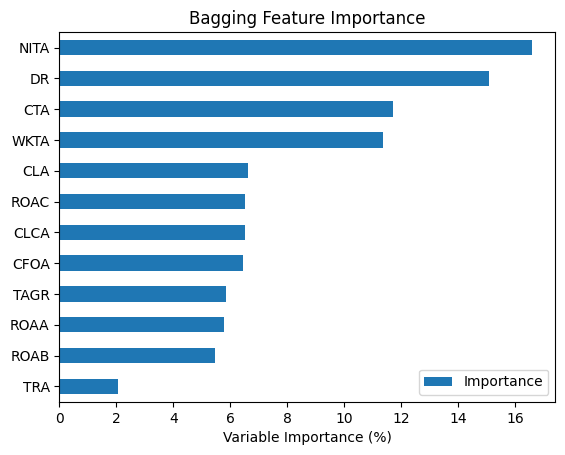

In [14]:
# -----------------------
# 4. FEATURE IMPORTANCE
# -----------------------

# Bagging
bagging_importance = pd.DataFrame({
    'Importance': bagging_bankrupt.feature_importances_ * 100
}, index=x_train.columns)

# Random Forest
rf_importance = pd.DataFrame({
    'Importance': rf_bankrupt.feature_importances_ * 100
}, index=x_train.columns)

# AdaBoost
ab_importance = pd.DataFrame({
    'Importance': adaboost_bankrupt.feature_importances_ * 100
}, index=x_train.columns)

# Plotting for Bagging
bagging_importance.sort_values(by='Importance', ascending=True).plot(kind='barh')
plt.xlabel('Variable Importance (%)')
plt.title('Bagging Feature Importance')
plt.show()

# Similarly, plots can be made for Random Forest and AdaBoost


# D) Feature Importance – Summary

- **Concept:** Feature importance = measure of contribution (hozzájárulás) of each predictor to the model
- **Bagging:** all features considered at each split, importance = contribution to ensemble prediction
- **Random Forest:** random subset of features, importance may change slightly, reduces correlation
- **AdaBoost:** importance = features that help correct errors of previous weak learners
- **Interpretation:**
  - Features with higher importance are more influential in predicting bankrupt/non-bankrupt
  - Helps identify key financial indicators (pl. liabilities, assets)
- **Note:** Ensemble methods lose interpretability (érthetőség) compared to a single decision tree, but feature importance still gives insight.


---
---
---
---
---
---
---
---

**2.3 Support Vector Machines (SVM)**

### Support Vector Machine (SVM)
- Finds the optimal hyperplane that best separates the data classes.
- Maximizes the margin (distance between classes).
- Only the support vectors affect the decision boundary.

### Kernel Trick
- Maps data to a higher-dimensional space.
- Allows non-linear separation.
- Common kernels: Linear, Polynomial, RBF, Sigmoid.


In [2]:
# Import necessary modules
from sklearn.svm import SVC                     # SVC supports support_vectors_
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Load data
x_train = pd.read_csv("data/lab2-alldata/x_train.csv", index_col=0)
x_test = pd.read_csv("data/lab2-alldata/x_test.csv", index_col=0)
y_train = pd.read_csv("data/lab2-alldata/y_train.csv", index_col=0)
y_test = pd.read_csv("data/lab2-alldata/y_test.csv", index_col=0)

# Standardize features to improve SVM performance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the parameter grid for C (cost / penalty for misclassification)
# ---------------------------------------------------------------------
# A 'C' paraméter a lineáris SVM egyik legfontosabb hiperparamétere.
# Meghatározza, hogy mennyire bünteti a modell a hibás besorolásokat:
#   - Kis C érték → "puha" határvonal: engedi, hogy néhány pont rosszul legyen besorolva,
#                   de a döntési határvonal simább és általánosabban működő lesz.
#   - Nagy C érték → "kemény" határvonal: a modell megpróbálja minden pontot helyesen besorolni,
#                    de ez túlillesztéshez (overfitting) vezethet.
# Itt több C értéket próbálunk ki, és a GridSearchCV segítségével kiválasztjuk a legjobbat.
tuned_parameters = [{'C': [0.01, 0.1, 1, 5]}]

# Create GridSearchCV object with 10-fold cross-validation
# ---------------------------------------------------------
# A GridSearchCV segítségével automatizáltan kipróbáljuk a fenti paraméterek
# összes lehetséges kombinációját, és 10-szeres kereszt-validációval
# meghatározzuk, melyik beállítás teljesít a legjobban.
#
# Paraméterek:
#   - SVC(kernel='linear'): lineáris kernelű SVM osztályozó.
#     A lineáris kernel azért előnyös, mert jól értelmezhető döntési határt ad,
#     és tartalmazza a 'support_vectors_' attribútumot, amiből megtudhatjuk,
#     hány mintapont befolyásolta közvetlenül a határvonalat.
#
#   - tuned_parameters: a kipróbálandó paraméterértékek listája.
#
#   - cv=10: tízszeres keresztvalidáció – a tanítóadatot 10 részre bontja,
#     majd minden iterációban 9 részen tanít, 1-en validál, és az eredményt átlagolja.
#
#   - scoring='balanced_accuracy': kiegyensúlyozott pontossági mérőszám,
#     amely akkor hasznos, ha az osztályok nem kiegyensúlyozottak (pl. kevés csődbe ment cég).
#
#   - n_jobs=-1: az összes elérhető CPU magot használja a gyorsabb futás érdekében.
svm_bankrupt_CV = GridSearchCV(
    SVC(kernel='linear'),
    tuned_parameters,
    cv=10,
    scoring='balanced_accuracy',
    n_jobs=-1
)

# Fit the model
# -------------
# A modell betanítása a skálázott tanító adatokon történik.
# A GridSearchCV ilyenkor minden megadott 'C' értékkel külön SVM-et tanít,
# és a keresztvalidációs pontosság alapján kiválasztja a legjobb modellt.
svm_bankrupt_CV.fit(x_train_scaled, np.ravel(y_train))

# Best C value
# ------------
# A keresés után a 'best_params_' attribútumban találjuk a legjobb paramétereket.
# Itt ez azt jelenti, hogy megkapjuk, melyik C érték adott a legjobb
# kiegyensúlyozott pontosságot a validáció során.
best_C = svm_bankrupt_CV.best_params_
print("Best C:", best_C)

# Number of support vectors
# --------------------------
# Az SVM modell lényege, hogy a döntési határt csak néhány minta (ún. "support vector")
# határozza meg. Ezek azok az adatpontok, amelyek a legközelebb vannak a döntési síkhoz.
#
# A 'support_' attribútum ezek indexeit tartalmazza a tanítóhalmazban.
# A hossza ('len(support_vectors)') megmutatja, hány ilyen pont vett részt
# a döntési határ kialakításában.
support_vectors = svm_bankrupt_CV.best_estimator_.support_
print("Number of support vectors:", len(support_vectors))



Best C: {'C': 0.01}
Number of support vectors: 396


### Linear SVM with Support Vectors – Exam Summary

- **Best C:** 0.01 → This is the optimal penalty (büntetés) for misclassification (tévesztés) on this dataset.
  - Small C → wide margin (széles margó), model allows more errors (több hiba), reduces overfitting (túlillesztés).
  - Large C → narrow margin (keskeny margó), fewer errors allowed, risk of overfitting.

- **Support vectors (támogató vektorok):** 396
  - These are the data points closest to the decision boundary (döntési határ / hyperplane).
  - They define the margin (margó) and are crucial for the classifier.
  - More support vectors → more complex model, many points near the boundary.
  - Fewer support vectors → simpler, cleaner separation.

- **Balanced accuracy (kiegyensúlyozott pontosság):** Used to evaluate performance for imbalanced datasets (pl. a csőd ritka).

**Interpretation for exam:**
- C = 0.01 gives a wide margin and tolerates misclassification of some points, which helps generalization (általánosítás).
- 396 support vectors define the decision boundary, showing how many points are critical for classification.
- No code is needed on the paper; just explain the role of C and support vectors.


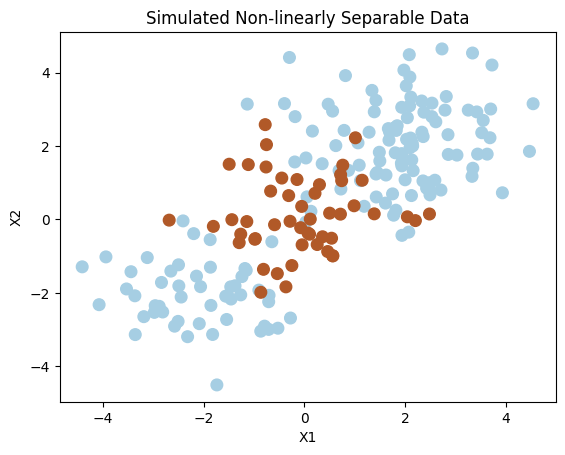

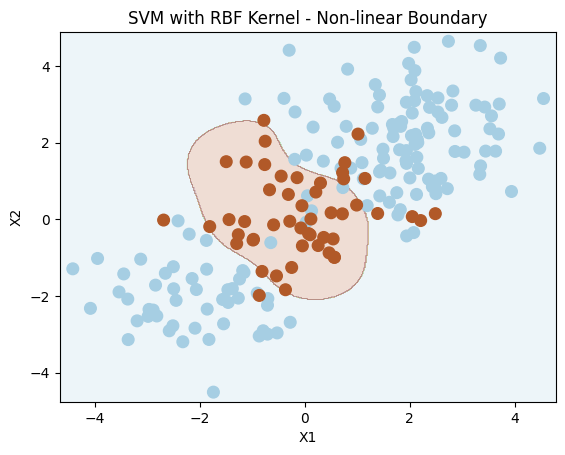

Confusion Matrix:
 [[145   5]
 [ 13  37]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.97      0.94       150
           1       0.88      0.74      0.80        50

    accuracy                           0.91       200
   macro avg       0.90      0.85      0.87       200
weighted avg       0.91      0.91      0.91       200



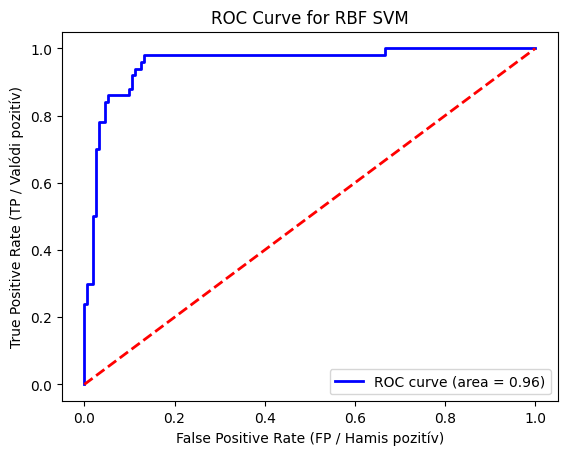

In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# ==============================
# Simulate non-linearly separable data
# ==============================
np.random.seed(8)  # fix random numbers for reproducibility (reprodukálhatóság)

# Create 200 random points in 2D
X = np.random.randn(200, 2)

# Shift first 100 points to the right/top
X[:100] = X[:100] + 2

# Shift next 50 points to bottom/left
X[101:150] = X[101:150] - 2

# Define labels: -1 for majority, 1 for minority
Y = np.concatenate([np.repeat(-1, 150), np.repeat(1, 50)])

# Plot the points
plt.scatter(X[:,0], X[:,1], s=70, c=Y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simulated Non-linearly Separable Data')
plt.show()

# ==============================
# Fit a Radial Basis Function (RBF) kernel SVM
# ==============================
# Radial kernel allows non-linear decision boundary
svm_radial = SVC(C=1.0, kernel='rbf', gamma=1)
svm_radial.fit(X, Y)

# Plot decision boundary
h = 0.02  # meshgrid step size
pad = 0.25  # add padding around data
x_min, x_max = X[:,0].min()-pad, X[:,0].max()+pad
y_min, y_max = X[:,1].min()-pad, X[:,1].max()+pad
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict every point in the meshgrid
Z = svm_radial.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary as contour
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X[:,0], X[:,1], s=70, c=Y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM with RBF Kernel - Non-linear Boundary')
plt.show()

# ==============================
# Optional: confusion matrix and classification report
# ==============================
Y_pred = svm_radial.predict(X)
cm = confusion_matrix(Y, Y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(Y, Y_pred)
print("Classification Report:\n", report)

# ==============================
# Optional: ROC curve
# ==============================
# Decision function outputs distance to margin
Y_score = svm_radial.decision_function(X)

fpr, tpr, thresholds = roc_curve(Y, Y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')  # random line
plt.xlabel('False Positive Rate (FP / Hamis pozitív)')
plt.ylabel('True Positive Rate (TP / Valódi pozitív)')
plt.title('ROC Curve for RBF SVM')
plt.legend(loc="lower right")
plt.show()

# The threshold can be chosen where TPR and FPR are reasonably balanced


# 🎯 ROC-görbe – rövid összefoglaló

## Mi az a ROC-görbe?
A **ROC-görbe** (Receiver Operating Characteristic) egy grafikon,
ami megmutatja, **mennyire jól különbözteti meg a modell a két osztályt** (pl. pozitív / negatív).

## Mit mutat?
- **x-tengely (FPR)** → hamis pozitív arány (téves riasztások aránya)
- **y-tengely (TPR)** → valódi pozitív arány (helyes találatok aránya)

A modell **különböző küszöbértékeire** kiszámoljuk a TPR–FPR párokat,
és ezeket összekötve kapjuk a görbét.

## Mire jó?
- Megmutatja, **mennyire megbízható** a modell különböző küszöböknél.
- Az **AUC (Area Under Curve)** érték jelzi az összteljesítményt:
  - 1.0 → tökéletes modell
  - 0.5 → véletlen tippelés

## Rövid példa

| Minta | Modell szerint csőd valószínűsége | Valódi címke |
|-------|-----------------------------------|---------------|
| A | 0.9 | 1 |
| B | 0.7 | 1 |
| C | 0.4 | 0 |
| D | 0.2 | 0 |

Ha **küszöb = 0.5**, akkor A és B → „csődös”, C és D → „nem csődös”.
Ha lejjebb viszed (pl. 0.3-ra), akkor C-t is csődösnek veszi →
**nő a találati arány (TPR)**, de **több lesz a téves riasztás (FPR)**.

A ROC-görbe azt mutatja, **hogyan változik ez az arány**,
ha a küszöböt 0-tól 1-ig végigpróbáljuk.

## Összefoglalva
A ROC-görbe:
> „Megmutatja, mennyire jól különbözteti meg a modell a két osztályt,
> és milyen kompromisszumot jelent a több találat vs. több téves riasztás.”

### SVM with Non-linear (RBF) Kernel – Exam Notes

1. **Problem:** Sometimes the data is not linearly separable (nem lineárisan szétválasztható).
   - A linear SVM cannot separate such points with a straight line.

2. **RBF kernel (Radial Basis Function / sugárbázis függvény):**
   - Transforms data into a higher-dimensional space (magasabb dimenzió), allowing non-linear separation (nem lineáris elválasztás).
   - Gamma parameter controls influence of single points (hatás sugar).

3. **Simulation:**
   - 200 points, 2D.
   - Majority class (-1) shifted, minority class (+1) clustered differently.
   - Plot shows overlapping clusters → linear separation impossible.

4. **Fitting RBF SVM:**
   - C = 1.0 → penalty for misclassification (tévesztés büntetése).
   - SVM finds non-linear boundary to separate the classes.

5. **Visualization:**
   - Decision boundary plotted with contourf.
   - Non-linear separation clearly visible.

6. **Confusion Matrix and Classification Report:**
   - Evaluate performance on simulated data.
   - Check how many points are correctly classified (TP, TN) and misclassified (FP, FN).

7. **ROC curve (Receiver Operating Characteristic / jeladó működési karakterisztika):**
   - Plots True Positive Rate (recall / visszahívás) vs. False Positive Rate (FP / hamis pozitív).
   - Threshold selection: choose a cutoff where TPR and FPR are balanced → good compromise between classes (osztályok).

**Key Points for Exam:**
- RBF kernel allows SVM to separate non-linear data.
- Support vectors and C control margin and classification errors.
- Confusion matrix, classification report, and ROC curve help evaluate performance.
- Threshold can be tuned to balance sensitivity (TPR) and specificity (1-FPR).


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Feltételezzük, hogy x_train, y_train már be van olvasva

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Kis paraméter grid a gyors futás érdekében
tuned_parameters = [{'C': [0.01, 0.1, 1], 'gamma': [0.5, 1]}]  # 3x2=6 kombináció

# GridSearchCV létrehozása, probability=False, n_jobs=-1 a gyors futáshoz
svm_radial_CV = GridSearchCV(
    SVC(kernel='rbf', probability=False),
    tuned_parameters,
    cv=5,                 # 5-fold CV, gyorsabb, de elég
    scoring='balanced_accuracy',
    n_jobs=-1             # minden CPU magot használ
)

# Fit
svm_radial_CV.fit(x_train_scaled, np.ravel(y_train))

# Legjobb paraméterek
best_params = svm_radial_CV.best_params_
print("Best C and gamma:", best_params)

# Final model
svm_final = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_final.fit(x_train_scaled, np.ravel(y_train))

# Predikció teszt adatra
y_test_pred = svm_final.predict(x_test_scaled)
print("Test predictions:", y_test_pred[:10])  # csak az első 10-et mutatjuk gyors ellenőrzéshez


ERROR! Session/line number was not unique in database. History logging moved to new session 40
Best C and gamma: {'C': 1, 'gamma': 0.5}
Test predictions: [0 0 0 0 0 0 0 0 0 0]


# SVM with RBF Kernel – ZH Summary

**Task:** Fit a Support Vector Machine (SVM) with a radial basis function (RBF) kernel, select the best hyperparameters `C` and `γ` using 10-fold cross-validation, and evaluate performance.

---

## Steps Performed

1. **Hyperparameter Tuning (C and γ)**
   - `C` (cost / penalty for misclassification / tévesztés büntetése) controls the trade-off between margin width and misclassification.
   - `γ` (gamma) determines the influence of a single training example (kernel width / mag befolyása).
   - Used `GridSearchCV` with 10-fold cross-validation to maximize **balanced accuracy** (average recall of both classes).

2. **Fitting the Final Model**
   - Selected the best combination of `C` and `γ`.
   - Fitted the SVM with RBF kernel to the training data.

3. **Evaluation**
   - Calculated the **confusion matrix**:
     - True Positive (TP / valódi pozitív): correctly predicted bankrupt companies.
     - False Positive (FP / hamis pozitív): predicted bankrupt but actually non-bankrupt.
     - True Negative (TN / valódi negatív): correctly predicted non-bankrupt.
     - False Negative (FN / hamis negatív): predicted non-bankrupt but actually bankrupt.
   - Generated the **classification report**:
     - **Precision** (pontosság): proportion of predicted positives that are correct → \( \text{Precision} = TP / (TP + FP) \)
     - **Recall** (érzékenység): proportion of actual positives detected → \( \text{Recall} = TP / (TP + FN) \)
     - **F1-score**: harmonic mean of precision and recall → balances the two metrics.

4. **Interpretation**
   - The selected SVM with RBF kernel can capture non-linear relationships in the data.
   - Balanced accuracy ensures that rare class (bankrupt) is properly considered.
   - Confusion matrix and classification report show how well the model predicts both classes.
   - ROC curve (optional) can be plotted to choose a threshold for a compromise between precision and recall.

---

**Key Takeaways for ZH**
- **C and γ selection** controls complexity and generalization.
- **RBF kernel** allows handling non-linearly separable data.
- Always check **balanced accuracy** for imbalanced datasets.
- Metrics interpretation focuses on TP, FP, TN, FN, precision, recall, and F1-score.
